In [1]:
from bs4 import BeautifulSoup
import urllib
import json
import os
import re
import requests
import pandas as pd
import re
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

response = requests.get('https://www.thegoodtee.com/collections/all', headers=headers).text

soup = BeautifulSoup(response, 'html.parser')

In [4]:
soup

<!DOCTYPE doctype html>

<html class="no-js" lang="en">
<head>
<script>
window.KiwiSizing = window.KiwiSizing === undefined ? {} : window.KiwiSizing;
KiwiSizing.shop = "thegoodtee786.myshopify.com";


</script>
<meta content="pbwjzgl82l0vdumdts8c3w3kbpmecf" name="facebook-domain-verification"/>
<!-- Hotjar Tracking Code for https://www.thegoodtee.com/ -->
<script>
    (function(h,o,t,j,a,r){
        h.hj=h.hj||function(){(h.hj.q=h.hj.q||[]).push(arguments)};
        h._hjSettings={hjid:2295537,hjsv:6};
        a=o.getElementsByTagName('head')[0];
        r=o.createElement('script');r.async=1;
        r.src=t+h._hjSettings.hjid+j+h._hjSettings.hjsv;
        a.appendChild(r);
    })(window,document,'https://static.hotjar.com/c/hotjar-','.js?sv=');
</script>
<!-- End of Hotjar Tracking Code for www.thegoodtee.com -->
<meta content="PalRfJD-TmIJak3xqYtqBwxqVCyDkTFR6m_kEx64C4A" name="google-site-verification"/>
<script type="text/javascript">var _0x2192=['origin','utm_source=shopsheriff&utm

In [5]:
script = soup.findAll('script', type='application/ld+json')[3].text.strip()

In [6]:
script2 = json.loads(script)

In [7]:
script2 = script2[1:]

In [8]:
script2[2]

{'@context': 'http://schema.org',
 '@type': 'Product',
 'aggregateRating': {'@type': 'AggregateRating',
  'description': 'Judge.me Reviews',
  'ratingValue': '5.00',
  'reviewCount': '3'},
 'brand': {'name': 'The Good Tee'},
 'description': 'Meet your new favorite everyday dress! The 100% organic cotton jersey midi dress mixes relaxed comfort with a rounded hem that flows with you as you move about your day. Crafted with 100% fairtrade organic cotton and eco-friendly dyes, this sleeveless tank dress features a flattering v-neck and a curved hem. This dress has just the right amount of stretch and softness for comfort, which gives it lots of airy movement.The perfect all day, any time of year dress. In the fall through on a pair of boots and a jacket and it makes for a perfect transitional piece. We love this dress for its stylish ease and versatility for layering. Get creative with this must-have piece!Dress length from center back approximately 47”- 49”Model is wearing size XS:\xa0 ch

In [9]:
items = {}

for item in script2:
  for offer in item['offers']:
    
    size_string = offer['sku'].split('-')
    color_string = offer['name'].split('/')
    color = None

    if len(color_string) == 1:
      color = color_string[0]
    elif len(color_string) == 2:
      if len(color_string[0]) > 3:
        color = color_string[0]
      else:
        color = color_string[1]
    else:
      i = 0
      for ele in color_string:
        if len(ele) > 3:
          color = ele
        i+=1

    items[offer['sku']] = {}

    # print(item['name'])
    # print(type(item['name']))

    items[offer['sku']]['item_name'] = item['name']
    items[offer['sku']]['color_name'] = color
    items[offer['sku']]['size'] = size_string[-1]
    items[offer['sku']]['price'] = offer['price']
    items[offer['sku']]['item_url'] = offer['url']
    items[offer['sku']]['description'] = item['description']
    items[offer['sku']]['image_url'] = item['image']


    # 'color_name' : color_string[0],
    # 'size' : size_string[-1],
    # 'price' : offer['price'],
    # 'item_url' : offer['url'],
    # 'description' : item['description'],
    # 'image_url' : item['image']
    

In [10]:
items

{'3SCR-D-BP-NV': {'color_name': 'purple-pack',
  'description': 'Good things come in three’s! Our Fairtrade scrunchies are made from upcycled materials. We used the same soft fabric from our Good t-shirts and utilized fabric from brands that canceled orders after Covid. This is one other way we support our factory. The Fairtrade scrunchie is perfect for your high ponies, messy buns, or just snap it around your wrists for an eco-friendly 90&#39;s touch. Scrunchies are gentler on the hair, causing less damage.Included Colors: Lavender, Mauve, BlackIncluded Colors: Natural Graffiti Print, Red Paisley, BlackIncluded Colors: Blue Butterfly print, Navy, Denim BlueIncluded Colors: Seafoam Green, Black, Green PrintOne-size. Easy to gift. Designed in Canada, Ethically Made in India. Radical Supply Chain Transparency',
  'image_url': 'https://cdn.shopify.com/s/files/1/0039/6915/5121/products/3SCR-M-B-L.jpg?v=1614272819',
  'item_name': '3 Pack Fair Scrunchies',
  'item_url': 'https://www.thegood

In [11]:
len(items)

394

In [12]:
items.keys()

dict_keys(['3SCR-M-B-L', '3SCR-SF-B-GP', '3SCR-RP-B-NP', '3SCR-D-BP-NV', 'GC-10', 'GC-20', 'GC-25', 'GC-50', 'GC-100', 'GC-75', 'TNKD21S-R-XS', 'TNKD21S-R-S', 'TNKD21S-R-M', 'TNKD21S-R-L', 'TNKD21S-R-XL', 'TNKD21S-W-XS', 'TNKD21S-W-S', 'TNKD21S-W-M', 'TNKD21S-W-L', 'TNKD21S-W-XL', 'WLPO21S-B-XS', 'WLPO21S-B-S', 'WLPO21S-B-M', 'WLPO21S-B-L', 'WLPO21S-B-XL', 'WLPO21S-R-XS', 'WLPO21S-R-S', 'WLPO21S-R-M', 'WLPO21S-R-L', 'WLPO21S-R-XL', 'WLPO21S-P-XS', 'WLPO21S-P-S', 'WLPO21S-P-M', 'WLPO21S-P-L', 'WLPO21S-P-XL', 'WSSD21S-B-XS', 'WSSD21S-B-S', 'WSSD21S-B-M', 'WSSD21S-B-L', 'WSSD21S-B-XL', 'WSSD21S-R-XS', 'WSSD21S-R-S', 'WSSD21S-R-M', 'WSSD21S-R-L', 'WSSD21S-R-XL', 'WSSD21S-P-XS', 'WSSD21S-P-S', 'WSSD21S-P-M', 'WSSD21S-P-L', 'WSSD21S-P-XL', 'WSBT21S-B-XS', 'WSBT21S-B-S', 'WSBT21S-B-M', 'WSBT21S-B-L', 'WSBT21S-B-XL', 'WSBT21S-W-XS', 'WSBT21S-W-S', 'WSBT21S-W-M', 'WSBT21S-W-L', 'WSBT21S-W-XL', 'WSBT21S-R-XS', 'WSBT21S-R-S', 'WSBT21S-R-M', 'WSBT21S-R-L', 'WSBT21S-R-XL', 'WSBT21S-P-XS', 'WSBT21S-

In [13]:
items['3SCR-M-B-L'].values()

dict_values(['3 Pack Fair Scrunchies', 'purple-pack', 'L', '21', 'https://www.thegoodtee.com/products/3-pack-scrunchies?variant=32319787040851', 'Good things come in three’s! Our Fairtrade scrunchies are made from upcycled materials. We used the same soft fabric from our Good t-shirts and utilized fabric from brands that canceled orders after Covid. This is one other way we support our factory. The Fairtrade scrunchie is perfect for your high ponies, messy buns, or just snap it around your wrists for an eco-friendly 90&#39;s touch. Scrunchies are gentler on the hair, causing less damage.Included Colors: Lavender, Mauve, BlackIncluded Colors: Natural Graffiti Print, Red Paisley, BlackIncluded Colors: Blue Butterfly print, Navy, Denim BlueIncluded Colors: Seafoam Green, Black, Green PrintOne-size. Easy to gift. Designed in Canada, Ethically Made in India. Radical Supply Chain Transparency', 'https://cdn.shopify.com/s/files/1/0039/6915/5121/products/3SCR-M-B-L.jpg?v=1614272819'])

In [14]:
items['3SCR-D-BP-NV']['price']

'21'

In [15]:
goodtee_df = pd.DataFrame.from_dict(items)

In [16]:
goodtee_df

,3SCR-M-B-L,3SCR-SF-B-GP,3SCR-RP-B-NP,3SCR-D-BP-NV,GC-10,GC-20,GC-25,GC-50,GC-100,GC-75,TNKD21S-R-XS,TNKD21S-R-S,TNKD21S-R-M,TNKD21S-R-L,TNKD21S-R-XL,TNKD21S-W-XS,TNKD21S-W-S,TNKD21S-W-M,TNKD21S-W-L,TNKD21S-W-XL,WLPO21S-B-XS,WLPO21S-B-S,WLPO21S-B-M,WLPO21S-B-L,WLPO21S-B-XL,WLPO21S-R-XS,WLPO21S-R-S,WLPO21S-R-M,WLPO21S-R-L,WLPO21S-R-XL,WLPO21S-P-XS,WLPO21S-P-S,WLPO21S-P-M,WLPO21S-P-L,WLPO21S-P-XL,WSSD21S-B-XS,WSSD21S-B-S,WSSD21S-B-M,WSSD21S-B-L,WSSD21S-B-XL,...,SGL21F-O-XL,SGL21F-M-XL,WLST20-W-XS,WLST20-W-S,WLST20-W-M,WLST20-W-L,WLST20-W-XL,WLST20-D-S,WLST20-S-S,WLST20-B-XS,WLST20-B-M,WLST20-B-S,WLST20-B-L,WLST20-B-XL,WST20-W-XS,WST20-B-XS,WST20-W-S,WST20-B-S,WST20-W-M,WST20-B-M,WST20-W-L,WST20-B-L,WST20-W-XL,WST20-B-XL,WST20-S-XS,WST20-S-S,WST20-S-M,WST20-S-XL,WST20-S-L,WST20-GM-S,WSSH20-B-XS,WSSH20-D-XS,WSSH20-B-S,WSSH20-D-S,WSSH20-B-M,WSSH20-D-M,WSSH20-B-L,WSSH20-D-L,WSSH20-B-XL,WSSH20-D-XL
item_name,3 Pack Fair Scrunchies,3 Pack Fair Scrunchies,3 Pack Fair Scrunchies,3 Pack Fair Scrunchies,Digital Gift Card,Digital Gift Card,Digital Gift Card,Digital Gift Card,Digital Gift Card,Digital Gift Card,Easy to Love Midi Dress,Easy to Love Midi Dress,Easy to Love Midi Dress,Easy to Love Midi Dress,Easy to Love Midi Dress,Easy to Love Midi Dress,Easy to Love Midi Dress,Easy to Love Midi Dress,Easy to Love Midi Dress,Easy to Love Midi Dress,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Fair Tunic,Everyday Pocket Dress,Everyday Pocket Dress,Everyday Pocket Dress,Everyday Pocket Dress,Everyday Pocket Dress,...,The Side Gather Cu-Tee,The Side Gather Cu-Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Organic Cotton Long Sleeve Tee,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Slim Fit Short Sleeve Organic Crewneck,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley,The Sustainable Coconut Button Henley
color_name,purple-pack,purple-pack,purple-pack,purple-pack,$10.00 CAD,$10.00 CAD,$10.00 CAD,$10.00 CAD,$10.00 CAD,$10.00 CAD,storm-grey,storm-grey,storm-grey,storm-grey,storm-grey,storm-grey,storm-grey,storm-grey,storm-grey,storm-grey,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,...,Black,Black,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,black,black,black,black,black,black,black,black,bl

In [63]:
goodtee_df2 = goodtee_df.T

In [64]:
goodtee_df2

,item_name,color_name,size,price,item_url,description,image_url
3SCR-M-B-L,3 Pack Fair Scrunchies,purple-pack,L,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...
3SCR-SF-B-GP,3 Pack Fair Scrunchies,purple-pack,GP,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...
3SCR-RP-B-NP,3 Pack Fair Scrunchies,purple-pack,NP,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...
3SCR-D-BP-NV,3 Pack Fair Scrunchies,purple-pack,NV,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...
GC-10,Digital Gift Card,$10.00 CAD,10,10,https://www.thegoodtee.com/products/gift-card?...,Give them the gift they want.Shopping for some...,https://cdn.shopify.com/s/files/1/0039/6915/51...
...,...,...,...,...,...,...,...
WSSH20-D-M,The Sustainable Coconut Button Henley,black,M,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...
WSSH20-B-L,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...
WSSH20-D-L,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...
WSSH20-B-XL,The Sustainable Coconut Button Henley,black,XL,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...


In [65]:
goodtee_df2.reset_index(inplace=True)

In [66]:
goodtee_df2

,index,item_name,color_name,size,price,item_url,description,image_url
0,3SCR-M-B-L,3 Pack Fair Scrunchies,purple-pack,L,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...
1,3SCR-SF-B-GP,3 Pack Fair Scrunchies,purple-pack,GP,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...
2,3SCR-RP-B-NP,3 Pack Fair Scrunchies,purple-pack,NP,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...
3,3SCR-D-BP-NV,3 Pack Fair Scrunchies,purple-pack,NV,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...
4,GC-10,Digital Gift Card,$10.00 CAD,10,10,https://www.thegoodtee.com/products/gift-card?...,Give them the gift they want.Shopping for some...,https://cdn.shopify.com/s/files/1/0039/6915/51...
...,...,...,...,...,...,...,...,...
389,WSSH20-D-M,The Sustainable Coconut Button Henley,black,M,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...
390,WSSH20-B-L,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...
391,WSSH20-D-L,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...
392,WSSH20-B-XL,The Sustainable Coconut Button Henley,black,XL,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...


In [67]:
goodtee_df2['sku'] = goodtee_df2['index']

In [68]:
del goodtee_df2['index']

In [69]:
goodtee_df2

,item_name,color_name,size,price,item_url,description,image_url,sku
0,3 Pack Fair Scrunchies,purple-pack,L,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...,3SCR-M-B-L
1,3 Pack Fair Scrunchies,purple-pack,GP,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...,3SCR-SF-B-GP
2,3 Pack Fair Scrunchies,purple-pack,NP,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...,3SCR-RP-B-NP
3,3 Pack Fair Scrunchies,purple-pack,NV,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...,3SCR-D-BP-NV
4,Digital Gift Card,$10.00 CAD,10,10,https://www.thegoodtee.com/products/gift-card?...,Give them the gift they want.Shopping for some...,https://cdn.shopify.com/s/files/1/0039/6915/51...,GC-10
...,...,...,...,...,...,...,...,...
389,The Sustainable Coconut Button Henley,black,M,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-D-M
390,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-B-L
391,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-D-L
392,The Sustainable Coconut Button Henley,black,XL,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-B-XL


In [70]:
goodtee_df2.dtypes

item_name      object
color_name     object
size           object
price          object
item_url       object
description    object
image_url      object
sku            object
dtype: object

In [44]:
print(goodtee_df2['item_url'][10])
print(goodtee_df2['sku'][10])

https://www.thegoodtee.com/products/sustainable-tank-dress?variant=39340343623763
TNKD21S-R-XS


In [45]:
print(goodtee_df2['item_url'][25])
print(goodtee_df2['sku'][25])

https://www.thegoodtee.com/products/tunic-top?variant=32392301183059
WLPO21S-R-XS


In [46]:
print(goodtee_df2['item_url'][45])
print(goodtee_df2['sku'][45])

https://www.thegoodtee.com/products/sustainable-pocket-dress?variant=32392309178451
WSSD21S-P-XS


In [71]:
goodtee_df3 = goodtee_df2['item_url'].str.split("/", n=5, expand=True)

In [72]:
goodtee_df3

,0,1,2,3,4
0,https:,,www.thegoodtee.com,products,3-pack-scrunchies?variant=32319787040851
1,https:,,www.thegoodtee.com,products,3-pack-scrunchies?variant=32319787073619
2,https:,,www.thegoodtee.com,products,3-pack-scrunchies?variant=32319787106387
3,https:,,www.thegoodtee.com,products,3-pack-scrunchies?variant=32319787139155
4,https:,,www.thegoodtee.com,products,gift-card?variant=31605757509715
...,...,...,...,...,...
389,https:,,www.thegoodtee.com,products,henley-t-shirt-for-women?variant=15948424446001
390,https:,,www.thegoodtee.com,products,henley-t-shirt-for-women?variant=15948424609841
391,https:,,www.thegoodtee.com,products,henley-t-shirt-for-women?variant=15948424642609
392,https:,,www.thegoodtee.com,products,henley-t-shirt-for-women?variant=15948424806449


In [73]:
goodtee_df3['type'] = goodtee_df3[4].str.contains("shirt|tee|t-shirt")

In [74]:
goodtee_df3

,0,1,2,3,4,type
0,https:,,www.thegoodtee.com,products,3-pack-scrunchies?variant=32319787040851,False
1,https:,,www.thegoodtee.com,products,3-pack-scrunchies?variant=32319787073619,False
2,https:,,www.thegoodtee.com,products,3-pack-scrunchies?variant=32319787106387,False
3,https:,,www.thegoodtee.com,products,3-pack-scrunchies?variant=32319787139155,False
4,https:,,www.thegoodtee.com,products,gift-card?variant=31605757509715,False
...,...,...,...,...,...,...
389,https:,,www.thegoodtee.com,products,henley-t-shirt-for-women?variant=15948424446001,True
390,https:,,www.thegoodtee.com,products,henley-t-shirt-for-women?variant=15948424609841,True
391,https:,,www.thegoodtee.com,products,henley-t-shirt-for-women?variant=15948424642609,True
392,https:,,www.thegoodtee.com,products,henley-t-shirt-for-women?variant=15948424806449,True


In [75]:
goodtee_df2['shirt'] = goodtee_df3['type']

In [76]:
goodtee_df2

,item_name,color_name,size,price,item_url,description,image_url,sku,shirt
0,3 Pack Fair Scrunchies,purple-pack,L,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...,3SCR-M-B-L,False
1,3 Pack Fair Scrunchies,purple-pack,GP,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...,3SCR-SF-B-GP,False
2,3 Pack Fair Scrunchies,purple-pack,NP,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...,3SCR-RP-B-NP,False
3,3 Pack Fair Scrunchies,purple-pack,NV,21,https://www.thegoodtee.com/products/3-pack-scr...,Good things come in three’s! Our Fairtrade scr...,https://cdn.shopify.com/s/files/1/0039/6915/51...,3SCR-D-BP-NV,False
4,Digital Gift Card,$10.00 CAD,10,10,https://www.thegoodtee.com/products/gift-card?...,Give them the gift they want.Shopping for some...,https://cdn.shopify.com/s/files/1/0039/6915/51...,GC-10,False
...,...,...,...,...,...,...,...,...,...
389,The Sustainable Coconut Button Henley,black,M,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-D-M,True
390,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-B-L,True
391,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-D-L,True
392,The Sustainable Coconut Button Henley,black,XL,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-B-XL,True


In [77]:
goodtee_df2 = goodtee_df2[(goodtee_df2.shirt==True)]

In [78]:
goodtee_df2

,item_name,color_name,size,price,item_url,description,image_url,sku,shirt
50,Fair &amp; Fave Cropped Pocket Tee,black,XS,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-XS,True
51,Fair &amp; Fave Cropped Pocket Tee,black,S,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-S,True
52,Fair &amp; Fave Cropped Pocket Tee,black,M,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-M,True
53,Fair &amp; Fave Cropped Pocket Tee,black,L,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-L,True
54,Fair &amp; Fave Cropped Pocket Tee,black,XL,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-XL,True
...,...,...,...,...,...,...,...,...,...
389,The Sustainable Coconut Button Henley,black,M,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-D-M,True
390,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-B-L,True
391,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-D-L,True
392,The Sustainable Coconut Button Henley,black,XL,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-B-XL,True


In [79]:
goodtee_df2.to_csv('thegoodtee.csv')

In [80]:
!cp thegoodtee.csv "drive/My Drive/Drexel/DSCI591/data"

In [85]:
goodtee_df2

,item_name,color_name,size,price,item_url,description,image_url,sku,shirt
50,Fair &amp; Fave Cropped Pocket Tee,black,XS,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-XS,True
51,Fair &amp; Fave Cropped Pocket Tee,black,S,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-S,True
52,Fair &amp; Fave Cropped Pocket Tee,black,M,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-M,True
53,Fair &amp; Fave Cropped Pocket Tee,black,L,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-L,True
54,Fair &amp; Fave Cropped Pocket Tee,black,XL,47,https://www.thegoodtee.com/products/sustainabl...,Favorite is an understatement. The perfectly f...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSBT21S-B-XL,True
...,...,...,...,...,...,...,...,...,...
389,The Sustainable Coconut Button Henley,black,M,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-D-M,True
390,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-B-L,True
391,The Sustainable Coconut Button Henley,black,L,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-D-L,True
392,The Sustainable Coconut Button Henley,black,XL,58,https://www.thegoodtee.com/products/henley-t-s...,We have updated the classic cap-sleeved henley...,https://cdn.shopify.com/s/files/1/0039/6915/51...,WSSH20-B-XL,True


In [87]:
for item in goodtee_df2['item_name']:
  print(item)

Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fair &amp; Fave Cropped Pocket Tee
Fave &amp; Fair Unisex Tee- 3 Pack
Fave &amp; Fair Unisex Tee- 3 Pack
Fave &amp; Fair Unisex Tee- 3 Pack
Fave &amp; Fair Unisex Tee- 3 Pack
Fave &amp; Fair Unisex Tee- 3 Pack
Fave &amp; Fair Unisex Tee- 3 Pack
Freedom Long Sleeve Tee
Freedom Long Sleeve Tee
Freedom Long Sleeve Tee
Freedom Long Sleev

In [81]:
plot_order1 = goodtee_df2.groupby('price')['price'].sum().sort_values(ascending=True).index.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


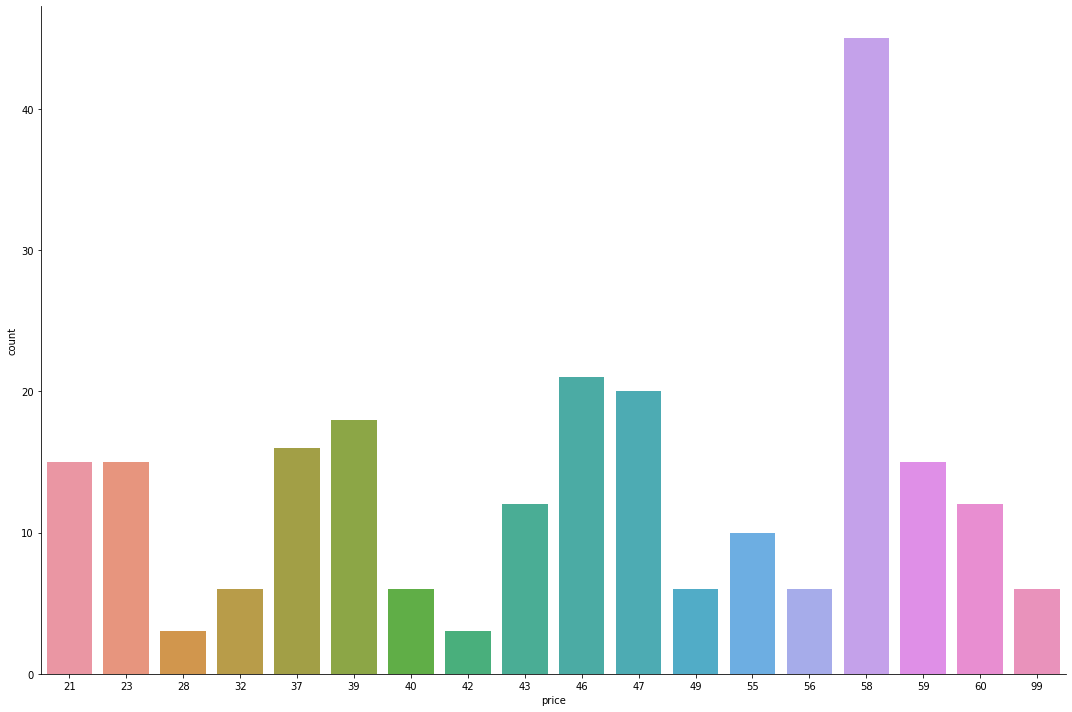

In [82]:
sn.catplot('price', data=goodtee_df2, kind='count', height=10, aspect=1.5, order=plot_order1)

In [110]:
# plot_order2 = goodtee_df2.groupby('size')['size'].sum().sort_values(ascending=True).index.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


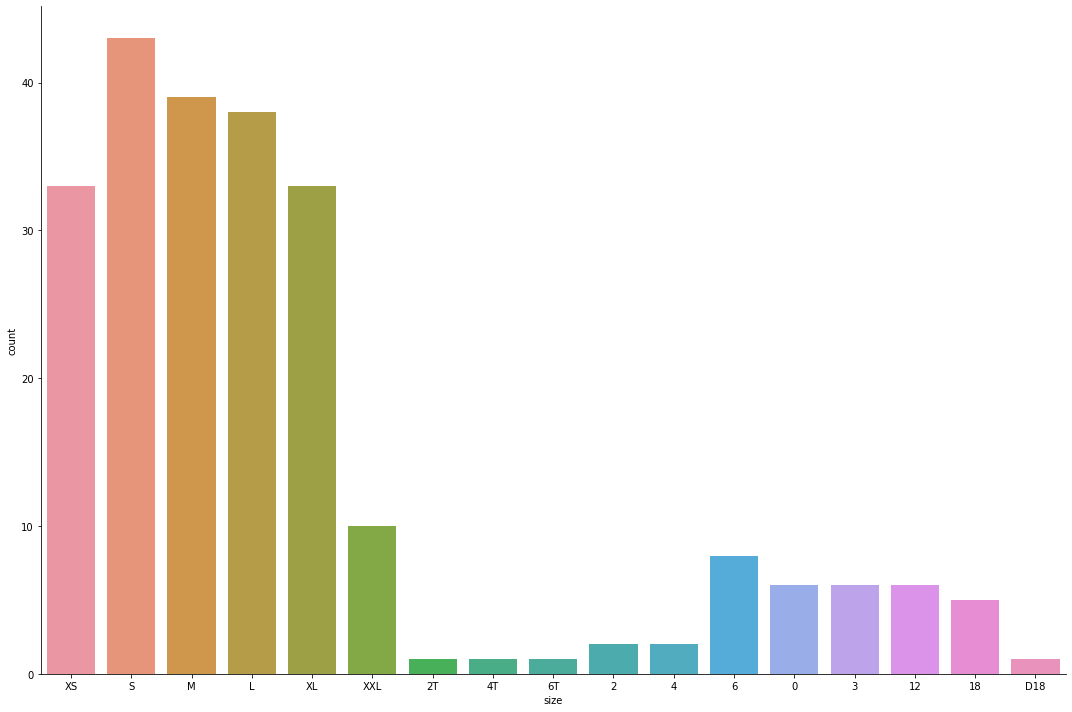

In [83]:
sn.catplot('size', data=goodtee_df2, kind='count', height=10, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


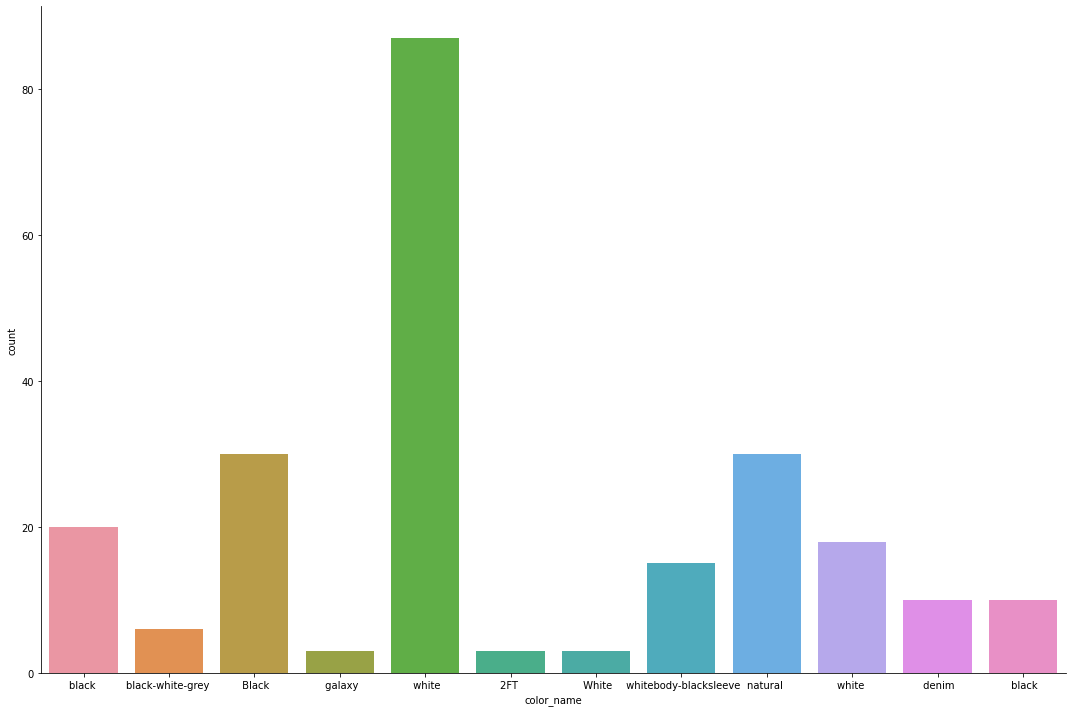

In [84]:
sn.catplot('color_name', data=goodtee_df2, kind='count', height=10, aspect=1.5)

In [ ]:
## Make this a dict

items

[['3 Pack Fair Scrunchies',
  'purple-pack',
  '3SCR-M-B-L',
  '21',
  'https://www.thegoodtee.com/products/3-pack-scrunchies?variant=32319787040851',
  'Good things come in three’s! Our Fairtrade scrunchies are made from upcycled materials. We used the same soft fabric from our Good t-shirts and utilized fabric from brands that canceled orders after Covid. This is one other way we support our factory. The Fairtrade scrunchie is perfect for your high ponies, messy buns, or just snap it around your wrists for an eco-friendly 90&#39;s touch. Scrunchies are gentler on the hair, causing less damage.Included Colors: Lavender, Mauve, BlackIncluded Colors: Natural Graffiti Print, Red Paisley, BlackIncluded Colors: Blue Butterfly print, Navy, Denim BlueIncluded Colors: Seafoam Green, Black, Green PrintOne-size. Easy to gift. Designed in Canada, Ethically Made in India. Radical Supply Chain Transparency',
  'https://cdn.shopify.com/s/files/1/0039/6915/5121/products/3SCR-M-B-L.jpg?v=1614272819']

In [ ]:
script[1]

'\n'

In [ ]:
script2[0]['url']

'https://www.thegoodtee.com/products/3-pack-scrunchies'

In [ ]:
urls = []

for script in script2:
  urls.append(script['url'])

In [ ]:
urls

['https://www.thegoodtee.com/products/3-pack-scrunchies',
 'https://www.thegoodtee.com/products/gift-card',
 'https://www.thegoodtee.com/products/sustainable-tank-dress',
 'https://www.thegoodtee.com/products/tunic-top',
 'https://www.thegoodtee.com/products/sustainable-pocket-dress',
 'https://www.thegoodtee.com/products/sustainable-t-shirt-pocket-tee',
 'https://www.thegoodtee.com/products/unisex-tee-3-pack',
 'https://www.thegoodtee.com/products/freedom-long-sleeve-tee',
 'https://www.thegoodtee.com/products/organic-cotton-eco-friendly-tie-dye-shirt',
 'https://www.thegoodtee.com/products/organic-cotton-adjustable-sleep-eye-mask',
 'https://www.thegoodtee.com/products/organic-cotton-tunic',
 'https://www.thegoodtee.com/products/sustainable-indigo-natural-dye-kit-tee-unisex',
 'https://www.thegoodtee.com/products/the-sustainable-indigo-dye-kit-good-tee-toddler',
 'https://www.thegoodtee.com/products/the-sustainable-indigo-dye-kit-good-youth-tee',
 'https://www.thegoodtee.com/products

In [ ]:
urls = urls[1:]

In [ ]:
len(urls)

49

In [ ]:
test_url = urls[6]

In [ ]:
test_url

'https://www.thegoodtee.com/products/freedom-long-sleeve-tee'

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

response2 = requests.get(test_url, headers=headers).text

soup2 = BeautifulSoup(response2, 'html.parser')

In [ ]:
soup2

<!DOCTYPE doctype html>

<html class="no-js" lang="en">
<head>
<script>
window.KiwiSizing = window.KiwiSizing === undefined ? {} : window.KiwiSizing;
KiwiSizing.shop = "thegoodtee786.myshopify.com";


KiwiSizing.data = {
  collections: "261639962707,91519942705",
  tags: "fall,pre-order,preorder,Women",
  product: "6598882230355",
  vendor: "The Good Tee",
  type: "Top",
  title: "Freedom Long Sleeve Tee",
  images: ["\/\/cdn.shopify.com\/s\/files\/1\/0039\/6915\/5121\/products\/LSTH21FMAUVE.png?v=1631810386","\/\/cdn.shopify.com\/s\/files\/1\/0039\/6915\/5121\/products\/LSTH21FMAUVE_2.png?v=1631810422","\/\/cdn.shopify.com\/s\/files\/1\/0039\/6915\/5121\/products\/LSTH21FMAUVE_3.png?v=1631810528","\/\/cdn.shopify.com\/s\/files\/1\/0039\/6915\/5121\/products\/LSTH21FMAUVE_4.png?v=1631832131","\/\/cdn.shopify.com\/s\/files\/1\/0039\/6915\/5121\/products\/LSTH21FMAUVE_5.png?v=1631831747","\/\/cdn.shopify.com\/s\/files\/1\/0039\/6915\/5121\/products\/lsth21f_Fullbody_jpg_2_edited-1.jpg?v=

In [ ]:
script3 = soup2.findAll('script', type='application/ld+json')

In [ ]:
script3

[<script type="application/ld+json">
 {
    "@context": "http://schema.org",
    "@type": "WebSite",
    "url": "https://www.thegoodtee.com/",
    "potentialAction": {
      "@type": "SearchAction",
      "target": "https://www.thegoodtee.com/search?q={search_term_string}",
      "query-input": "required name=search_term_string"
    }
 }
 </script>, <script type="application/ld+json">
 {
 	"@context": "http://schema.org",
 	"@type": "Organization",
 	"url": "http://www.thegoodtee.com"}
 </script>, <script type="application/ld+json">
     {
         "@context": "http://schema.org",
         "@type": "BreadcrumbList",
         "itemListElement": [{
             "@type": "ListItem",
             "position": 1,
             "item": {
                 "@type": "Website",
                 "@id": "https://www.thegoodtee.com",
                 "name": " "
             }
         },{
                 "@type": "ListItem",
                 "position": 2,
                 "item": {
               

In [ ]:
script4 = soup2.findAll('p')

In [ ]:
script4[0]

<p data-mce-fragment="1"><span data-mce-fragment="1" data-mce-style="font-weight: 400;" style="font-weight: 400;">Easy and effortless, is this relaxed fit pullover. Our classic  baseball tee style featuring a flowy silhouette, slouchy sleeves and the oh so important thumb holes!</span></p>

In [ ]:
script5 = soup2.findAll('div', class_='collapsible-content__inner rte')

In [ ]:
script5

[<div class="collapsible-content__inner rte">
 <p><b>Good Fabric</b></p>
 <p><span style="font-weight: 400;">✔Certified organic cotton and eco-friendly dyes certified by GOTS  </span></p>
 <p><span style="font-weight: 400;">Global Organic Textile Standard (GOTS) means that’s products meet the gold standard of textile production. It exceeds organic fiber requirements, contains no restricted chemicals and meets strict social responsibility standards.</span></p>
 <p><span style="font-weight: 400;">✔Enzyme and bio washed for incredible softness (eco-friendly of course)</span></p>
 <p><span style="font-weight: 400;">✔Long-staple ring spun yarns mean our fabric is super soft</span></p>
 <p><span style="font-weight: 400;">✔Premium yarns are knit to the highest standards creating durable fabrics that last and resist holes</span></p>
 <p><span style="font-weight: 400;">✔Pre-shrunk and treated to ensure minimal shrinkage</span></p>
 <p><span style="font-weight: 400;">✔Fair Trade certified</span>

In [ ]:
ps = []

for p in script5:
  string = str(p).replace('<p>', '')
  string = string.replace('</p>', '')
  string = string.replace('<b>', '')
  string = string.replace('</b>', '')
  string = string.replace('</span>', '')
  string = string.replace('<span style="font-weight: 400;"', '')
  ps.append(string)
  # print(p)

In [ ]:
ps

['<div class="collapsible-content__inner rte">\nGood Fabric\n>✔Certified organic cotton and eco-friendly dyes certified by GOTS\xa0\xa0\n>Global Organic Textile Standard (GOTS) means that’s products meet the gold standard of textile production. It exceeds organic fiber requirements, contains no restricted chemicals and meets strict social responsibility standards.\n>✔Enzyme and bio washed for incredible softness (eco-friendly of course)\n>✔Long-staple ring spun yarns mean our fabric is super soft\n>✔Premium yarns are knit to the highest standards creating durable fabrics that last and resist holes\n>✔Pre-shrunk and treated to ensure minimal shrinkage\n>✔Fair Trade certified\nGood Care\nWash Cold/Wash Full: >Wash your clothes in cold rather than hot. Wash full loads to save on the amount of energy you use. Switching to an Energy Starmuch as 7,000 gallons of water per year. Use enviro-friendly detergents.\nAir Dry: >Skip the dryer- it uses lots of energy and emits CO2. Instead, air dry o

In [ ]:
elements = []

elements.append(ps[0])
elements.append(ps[2])
elements.append(ps[3])
elements.append(ps[4])
elements.append(ps[5])
elements.append(ps[6])
elements.append(ps[7])
elements.append(ps[8])

In [ ]:
elements

['<p data-mce-fragment="1"><span data-mce-fragment="1" data-mce-style="font-weight: 400;" style="font-weight: 400;">Easy and effortless, is this relaxed fit pullover. Our classic\xa0 baseball tee style featuring a flowy silhouette, slouchy sleeves and the oh so important thumb holes!',
 '<br/>',
 'Good Fabric',
 '>✔Certified organic cotton and eco-friendly dyes certified by GOTS\xa0\xa0',
 '>Global Organic Textile Standard (GOTS) means that’s products meet the gold standard of textile production. It exceeds organic fiber requirements, contains no restricted chemicals and meets strict social responsibility standards.',
 '>✔Enzyme and bio washed for incredible softness (eco-friendly of course)',
 '>✔Long-staple ring spun yarns mean our fabric is super soft',
 '>✔Premium yarns are knit to the highest standards creating durable fabrics that last and resist holes']

In [ ]:
## Seeing if all links have the above structure - maybe we'll get lucky

In [ ]:
for url in urls:
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

  response2 = requests.get(url, headers=headers).text

  soup2 = BeautifulSoup(response2, 'html.parser')

  script3 = soup2.findAll('script', type='application/ld+json')

  script4 = soup2.findAll('p')

  ps = []

  for p in script4:
    string = str(p).replace('<p>', '')
    string = string.replace('</p>', '')
    string = string.replace('<b>', '')
    string = string.replace('</b>', '')
    string = string.replace('</span>', '')
    string = string.replace('<span style="font-weight: 400;"', '')
    ps.append(string)

  elements = []

  elements.append(ps[0])
  elements.append(ps[2])
  elements.append(ps[3])
  elements.append(ps[4])
  elements.append(ps[5])
  elements.append(ps[6])
  elements.append(ps[7])
  elements.append(ps[8])

  print(elements)

['Give them the gift they want.', 'Gift cards are delivered by email and contain instructions to redeem them at checkout.', 'Our gift cards have no additional processing fees and can be bought in different and/ or multiple denominations.\xa0', 'So go ahead, show them how much you care with a gift card!', 'Good Fabric', '>✔Certified organic cotton and eco-friendly dyes certified by GOTS\xa0\xa0', '>Global Organic Textile Standard (GOTS) means that’s products meet the gold standard of textile production. It exceeds organic fiber requirements, contains no restricted chemicals and meets strict social responsibility standards.', '>✔Enzyme and bio washed for incredible softness (eco-friendly of course)']
['<p data-mce-fragment="1"><span data-mce-fragment="1" data-mce-style="font-weight: 400;" style="font-weight: 400;">Meet your new favorite everyday dress! The 100% organic cotton jersey midi dress mixes relaxed comfort with a rounded hem that flows with you as you move about your day. Crafte

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

response = requests.get('https://www.zara.com/us/en/pocket-t-shirt-premium-p00977319.html?v1=130384636&v2=1886142', headers=headers).text

soup = BeautifulSoup(response, 'html.parser')

In [ ]:
soup

<!DOCTYPE html>
<html class="web-standard new-front edge-front no-js" data-store="us" dir="ltr" id="product-130378382" lang="en-US"><head><meta charset="utf-8"/><title data-react-helmet="true">POCKET T-SHIRT PREMIUM - Black | ZARA United States</title><meta content="Full cut T-shirt with round neck and short sleeves. Chest patch pocket." data-react-helmet="true" name="description"/><meta content="2021-10-19T00:33:45Z" data-react-helmet="true" http-equiv="last-modified"/><meta content="en-US" data-react-helmet="true" http-equiv="content-language"/><meta content="width=device-width, initial-scale=1.0" data-react-helmet="true" name="viewport"/><meta content="2021-10-19T00:33:45Z" data-react-helmet="true" name="date"/><meta content="POCKET T-SHIRT PREMIUM" data-react-helmet="true" property="og:title"/><meta content="product" data-react-helmet="true" property="og:type"/><meta content="https://static.zara.net/photos///2021/I/0/2/p/0977/319/800/2/w/560/0977319800_1_1_1.jpg?ts=1633521645624" d

In [ ]:
script10 = soup.find('div', class_='product-detail-extra-detail__section')

In [ ]:
print(script10)

None


In [ ]:
url = "https://www.zara.com/us/en/pocket-t-shirt-premium-p00977319.html?v1=130384636&v2=1886142"
headers = {
    'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko)"
}
# request website content and parse with beautifulsoup
r = requests.get(url, headers = headers)


In [ ]:
r

<Response [200]>

In [ ]:
r.content

b'<!DOCTYPE html><html id="product-130378382" class="web-standard new-front edge-front  no-js" data-store="us"  dir="ltr" id="product-130378382" lang="en-US"><head><meta charset="utf-8" /><title data-react-helmet="true">POCKET T-SHIRT PREMIUM - Black | ZARA United States</title><meta data-react-helmet="true" name="description" content="Full cut T-shirt with round neck and short sleeves. Chest patch pocket."/><meta data-react-helmet="true" http-equiv="last-modified" content="2021-10-19T00:52:19Z"/><meta data-react-helmet="true" http-equiv="content-language" content="en-US"/><meta data-react-helmet="true" name="viewport" content="width=device-width, initial-scale=1.0"/><meta data-react-helmet="true" name="date" content="2021-10-19T00:52:19Z"/><meta data-react-helmet="true" property="og:title" content="POCKET T-SHIRT PREMIUM"/><meta data-react-helmet="true" property="og:type" content="product"/><meta data-react-helmet="true" property="og:image" content="https://static.zara.net/photos///20

In [ ]:
soup = BeautifulSoup(r.content, 'html.parser')

In [ ]:
soup

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [ ]:
!pip install webdriver-manager

     |████████████████████████████████| 127 kB 52.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.0.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install --upgrade urllib3

  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
url = 'https://www.zara.com/us/en/pocket-t-shirt-premium-p00977319.html?v1=130384636&v2=1886142'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

[WDM] - 

[WDM] - ====== WebDriver manager ======


ValueError: ignored

In [ ]:
m = soup.find("div", {"class": "product-detail-view__main-content"})

In [ ]:
m

<div class="product-detail-view__main-content"><section class="product-detail-images product-detail-view__images product-detail-images--with-thumbnails product-detail-images--is-centered product-detail-images--is-hidden"><ul class="product-detail-images__images" style="transform:translateY(0px);pointer-events:auto;width:auto"><li class="product-detail-images__image-wrapper"><button class="product-detail-images__image-action-wrapper"><div class="media product-detail-images__image"><div class="media__wrapper media__wrapper--fill media__wrapper--force-height" style="height:100%"><picture class="media-image"><source media="(min-width: 768px)" sizes="40vw" srcset="https://static.zara.net/photos///2021/I/0/2/p/0977/319/800/2/w/563/0977319800_1_1_1.jpg?ts=1633521645624 563w, https://static.zara.net/photos///2021/I/0/2/p/0977/319/800/2/w/750/0977319800_1_1_1.jpg?ts=1633521645624 750w, https://static.zara.net/photos///2021/I/0/2/p/0977/319/800/2/w/850/0977319800_1_1_1.jpg?ts=1633521645624 850w,